In [49]:
import sys
import json
import requests
import re
import string
import collections
import matplotlib.pyplot as pl

In [50]:
def get_content(article_name):
    s = requests.Session()
    page_url = "https://en.wikipedia.org/w/api.php"
    req_params = {"action":"query","prop":"revisions","titles":article_name,"rvslots":"main","rvprop":"content", "rvsection": 0,"formatversion":"2","format":"json"}
    r = s.get(url=page_url, params=req_params)
    data = r.json()
    print(data)
    return data

In [51]:
data=get_content("Ozone_layer")

{'batchcomplete': True, 'query': {'normalized': [{'fromencoded': False, 'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': [{'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', 'content': '{{pp-semi-indef}}\n{{short description|Region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet radiation}}\n[[File:Ozone cycle.svg|thumb|upright=1.5|[[Ozone-oxygen cycle]] in the ozone layer.]]\n\nThe \'\'\'ozone layer\'\'\' or \'\'\'ozone shield\'\'\' is a region of [[Earth]]\'s [[stratosphere]] that absorbs most of the [[Sun]]\'s [[ultraviolet]]  radiation. It contains a high concentration of [[ozone]] (O<sub>3</sub>) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts

In [52]:
def merge_contents(data):   
    
    query = data['query']
    pages = query['pages']
    pages = pages[0]
    title = pages['title']
    revisions = pages['revisions']
    revisions = revisions[0]
    slots = revisions['slots']
    main = slots['main']
    content = main['content']
    
    content_to_list = content.splitlines()
    
    trimmed_content = content_to_list[4:12:2]
    
    delim = ','
    cleaned_content = delim.join(trimmed_content)
   
    cleaned_content = cleaned_content.lower()
    cleaned_content = re.sub('&nbsp;', ' ', cleaned_content)
    cleaned_content= re.sub('<[^>]+>', '', cleaned_content)
    cleaned_content = re.sub('{{cite[^}}]+}}', '', cleaned_content)
    cleaned_content = re.sub('\[http[^\]]+]', '', cleaned_content) 
    cleaned_content = re.sub('\[{2}|\]{2}', '', cleaned_content)
    cleaned_content = re.sub('\|', ' ', cleaned_content)
    cleaned_content = re.sub('\'{3}', '', cleaned_content)
    cleaned_content = re.sub('\{{2}', '', cleaned_content)
    cleaned_content = re.sub('\}{2}', '', cleaned_content)
    cleaned_content = re.sub('\.\s?\,', '. ', cleaned_content)
    

    print(cleaned_content)
    return cleaned_content

In [53]:
merge_content = merge_contents(data)

the ozone layer or ozone shield is a region of earth's stratosphere that absorbs most of the sun's ultraviolet  radiation. it contains a high concentration of ozone (o3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. the ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in earth's atmosphere as a whole is about 0.3 parts per million. the ozone layer is mainly found in the lower portion of the stratosphere, from approximately convert 15 to 35 km sp=us 0 above earth, although its thickness varies seasonally and geographically. the ozone layer was discovered in 1913 by the french physicists charles fabry and henri buisson. measurements of the sun showed that the radiation sent out from its surface and reaching the ground on earth is usually consistent with the spectrum of a black body with a temperature in the range of convert 5500 – 6000 k c, except that there was no radi

In [54]:
def tokenize(content):
    list_of_words = re.findall(r"[\w]+", content)
    print (list_of_words)
    return list_of_words

In [55]:
collection = tokenize(merge_content)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'convert', '15', 'to', '35', 'km', 'sp', 'us', '0', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 

In [56]:
def lower_collection(collection):
    for i in range(len(collection)):
        collection[i] = collection[i].lower()
    print(collection)
    return collection

In [57]:
collection = lower_collection(collection)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 's', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 's', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 's', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', 'convert', '15', 'to', '35', 'km', 'sp', 'us', '0', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 

In [58]:
def count_frequency(collection):
    count_hash = {}
    for word in collection:
        count_hash[word] = count_hash.get(word,0) + 1
    print (count_hash)
    return count_hash

In [59]:
frequencies = count_frequency(collection)

{'the': 37, 'ozone': 17, 'layer': 7, 'or': 2, 'shield': 1, 'is': 6, 'a': 9, 'region': 1, 'of': 17, 'earth': 5, 's': 5, 'stratosphere': 3, 'that': 8, 'absorbs': 2, 'most': 1, 'sun': 3, 'ultraviolet': 3, 'radiation': 6, 'it': 2, 'contains': 2, 'high': 1, 'concentration': 2, 'o3': 1, 'in': 12, 'relation': 2, 'to': 11, 'other': 3, 'parts': 3, 'atmosphere': 3, 'although': 2, 'still': 1, 'small': 1, 'gases': 1, 'less': 1, 'than': 1, '10': 1, 'per': 2, 'million': 2, 'while': 1, 'average': 1, 'as': 2, 'whole': 1, 'about': 3, '0': 2, '3': 1, 'mainly': 2, 'found': 1, 'lower': 1, 'portion': 1, 'from': 4, 'approximately': 1, 'convert': 2, '15': 1, '35': 1, 'km': 1, 'sp': 1, 'us': 1, 'above': 1, 'its': 3, 'thickness': 1, 'varies': 1, 'seasonally': 1, 'and': 6, 'geographically': 1, 'was': 6, 'discovered': 1, '1913': 1, 'by': 5, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'out': 1, 'surface': 2, 'reaching': 1, 'ground': 

In [60]:
def print_most_frequent(frequencies, n):
    frequency_counter = collections.Counter(frequencies)
    for word,number in frequency_counter.most_common(n):
        print(word,'-',number)

In [61]:
print_most_frequent(frequencies,10)

the - 37
ozone - 17
of - 17
in - 12
to - 11
a - 9
that - 8
layer - 7
is - 6
radiation - 6


In [62]:
def visualize(frequencies,n):
    frequency_counter = collections.Counter(frequencies)
    top_n = frequency_counter.most_common(n)   
    top_n_hash = dict(top_n)   
    keys = list(top_n_hash.keys())
    values = list(top_n_hash.values())
    keys.reverse()
    values.reverse()
    plt.figure(figsize=(10, 8))
    plt.rcParams['axes.facecolor'] = '#f6ead4'
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='x', alpha=0.7)
    plt.barh(keys,values,color="#a2a595",height=0.7)  
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title("Most Common Tokens in the Ozone layer article")    
    plt.show

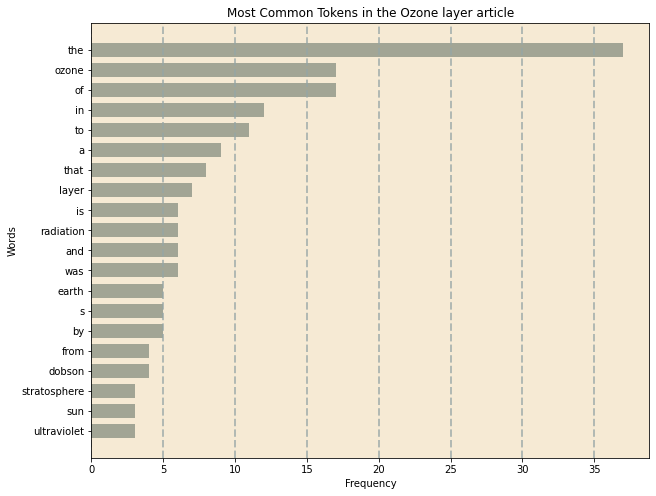

In [63]:
visualize(frequencies,20)

In [64]:
stop_words = ['the', 'or', 'is', 'a',  'of', 's',  'that',  'most', 'it', 'in', 'to', 'other', 'although', 'still', 'gases', 'less', 'than', '10', 'per', 'while', 'as', 'about', '0', '3', 'mainly', 'from', 'approximately', 'convert', '15', '35', 'km', 'sp', 'us', 'above', 'its', 'and', 'was', 'by', 'out', 'on', 'usually', 'with', '5500', '6000', 'k', 'c', 'except', 'there', 'no', 'below', 'at', 'end', 'being', 'only', 'one', 'were', 'g', 'm', 'b', 'who',  'could', 'be', 'used', 'between', 'which', 'this', 'his', '97', '99', '200', '315', 'otherwise', 'would', 'due',  'including', 'an',  '6th',  'see', 'p13', '19', 'led',  'has',  '16', 'for']

In [65]:
def remove_stop_words(words,stop_words):
    new_collection = [word for word in words if word not in stop_words]
    print(new_collection)
    return new_collection

In [66]:
filtered_collection = remove_stop_words(collection,stop_words)

['ozone', 'layer', 'ozone', 'shield', 'region', 'earth', 'stratosphere', 'absorbs', 'sun', 'ultraviolet', 'radiation', 'contains', 'high', 'concentration', 'ozone', 'o3', 'relation', 'parts', 'atmosphere', 'small', 'relation', 'stratosphere', 'ozone', 'layer', 'contains', 'parts', 'million', 'ozone', 'average', 'ozone', 'concentration', 'earth', 'atmosphere', 'whole', 'parts', 'million', 'ozone', 'layer', 'found', 'lower', 'portion', 'stratosphere', 'earth', 'thickness', 'varies', 'seasonally', 'geographically', 'ozone', 'layer', 'discovered', '1913', 'french', 'physicists', 'charles', 'fabry', 'henri', 'buisson', 'measurements', 'sun', 'showed', 'radiation', 'sent', 'surface', 'reaching', 'ground', 'earth', 'consistent', 'spectrum', 'black', 'body', 'temperature', 'range', 'radiation', 'wavelength', '310', 'nm', 'ultraviolet', 'spectrum', 'deduced', 'missing', 'radiation', 'absorbed', 'something', 'atmosphere', 'eventually', 'spectrum', 'missing', 'radiation', 'matched', 'known', 'che

In [67]:
filtered_frequencies = count_frequency(filtered_collection)

{'ozone': 17, 'layer': 7, 'shield': 1, 'region': 1, 'earth': 5, 'stratosphere': 3, 'absorbs': 2, 'sun': 3, 'ultraviolet': 3, 'radiation': 6, 'contains': 2, 'high': 1, 'concentration': 2, 'o3': 1, 'relation': 2, 'parts': 3, 'atmosphere': 3, 'small': 1, 'million': 2, 'average': 1, 'whole': 1, 'found': 1, 'lower': 1, 'portion': 1, 'thickness': 1, 'varies': 1, 'seasonally': 1, 'geographically': 1, 'discovered': 1, '1913': 1, 'french': 1, 'physicists': 1, 'charles': 1, 'fabry': 1, 'henri': 1, 'buisson': 1, 'measurements': 1, 'showed': 1, 'sent': 1, 'surface': 2, 'reaching': 1, 'ground': 2, 'consistent': 1, 'spectrum': 3, 'black': 1, 'body': 1, 'temperature': 1, 'range': 1, 'wavelength': 2, '310': 1, 'nm': 3, 'deduced': 1, 'missing': 2, 'absorbed': 1, 'something': 1, 'eventually': 1, 'matched': 1, 'known': 1, 'chemical': 1, 'properties': 1, 'explored': 1, 'detail': 1, 'british': 1, 'meteorologist': 1, 'dobson': 4, 'developed': 1, 'simple': 1, 'spectrophotometry': 1, 'spectrophotometer': 1, '

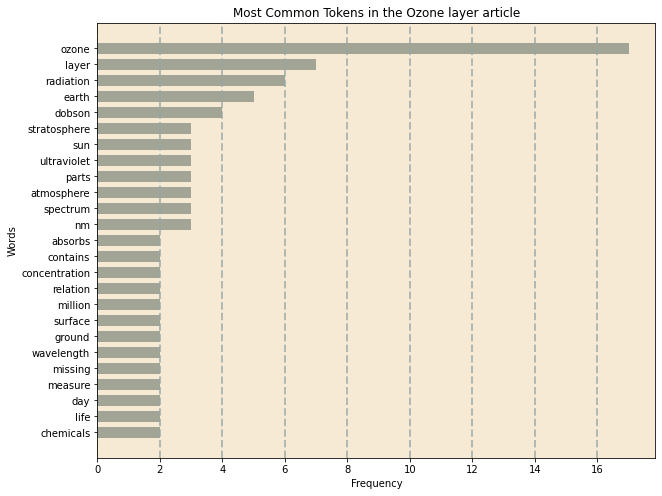

In [68]:
visualize(filtered_frequencies, 25)